# This is a study of the **Brazilian E-Commerce Public Dataset by Olist** 

In this notebook I will use the "olist_order_payments_dataset.csv" to make some analysis in order to improve my comprehension and adquire knew skills about data science. 

This dataset came from: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Author: Pierre Lima

Github: https://github.com/Pierrelimaa

Initial date: 05/17/2022

# Configuring the enviroment and Importing libraries

In [ ]:
!pip install pandas==1.3.5
!pip install seaborn==0.11.2
!pip install numpy==1.21.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'numpy version: {np.__version__}')


pandas version: 1.3.5
seaborn version: 0.11.2
numpy version: 1.21.6


# Dataset informations and first impressions

In order to understand this dataset, let's take some notes of the features and write them below.  

In [ ]:
data =  pd.read_csv('olist_order_payments_dataset.csv')

In [ ]:
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## Features


**order_id(Type: object)**: unique identifier of an order.
 
*Ordinal categorical(qualitative) variable*

---


**payment_sequential(Type: int64)**: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to. 

*Discrete quantitative variable*

---

**payment_type(Type: object)**: method of payment chosen by the customer.

*Nominal categorical(qualitative) variable*

---

**payment_installments(Type: int64)**: number of installments chosen by the customer.

*Discrete quantitative variable*

---

**payment_value(Type: float64)**: transaction value.

*Continuous quantitative variable*


## Data

We have exactly 103886 rows and 0 occurancies of missing values

In [ ]:
data.shape

(103886, 5)

In [ ]:
data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## **Unique values**

----



> order_id: 99440 

> payment_sequential: 29

> payment_type: 5 (credit_card, boleto, voucher, debit_card, not_defined)

> payment_installments: 24

> payment_value: 29077



In [ ]:
for i in data.columns:
  print(f'{i}: {len(data[i].unique())}')

order_id: 99440
payment_sequential: 29
payment_type: 5
payment_installments: 24
payment_value: 29077


In [ ]:
data['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
data['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [ ]:
np.sort(data['payment_installments'].unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24])

# Payment type

Conclusions:


*   The major payment type is the credit card (73%), this should occur because that's an easy method of payment and that ussualy get approved in an instant.
* Boleto is the seccond most commom payment  (19%), in Brazil it's very commom that when you pay with boleto option you get a discount and probably that's the reason of boleto be the second most commom payment type.
* We can see that debit card is barely used as form of payment, this should happen because this dataset contain purchases made at internet often paid with credit card or boleto as shown in the analysis, probably for more security.


In [ ]:
data['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
data['payment_type'].mode()

0    credit_card
dtype: object

In [ ]:
data['payment_type'].value_counts()[0]

76795

## Frequency dataframe

In [ ]:
payment_type_frequencies = data['payment_type'].value_counts()
df_payment_type = pd.DataFrame({'Frequency': payment_type_frequencies})

df_payment_type.rename_axis('Types', axis= 'columns', inplace = True)
df_payment_type

Types,Frequency
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [ ]:
payment_type_percentual = data['payment_type'].value_counts(normalize = True) * 100
df_payment_type['Percentual (%)'] = round(payment_type_percentual,2)
df_payment_type

Types,Frequency,Percentual (%)
credit_card,76795,73.92
boleto,19784,19.04
voucher,5775,5.56
debit_card,1529,1.47
not_defined,3,0.00


### Visualization

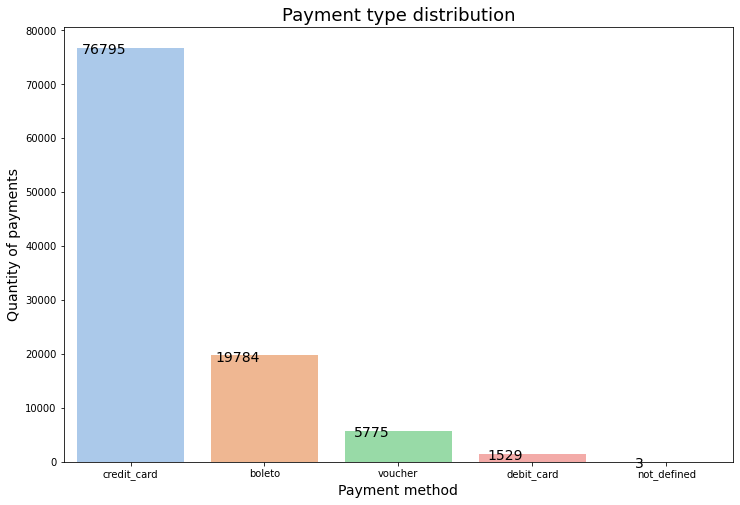

In [ ]:
ax = sns.countplot(x='payment_type', data=data,
                   palette= 'pastel')
              
ax.figure.set_size_inches(12, 8) # Changing figure size
ax.set_title('Payment type distribution', fontsize=18)  # Setting the title
ax.set_xlabel('Payment method', fontsize=14) # Define name of x label
ax.set_ylabel('Quantity of payments', fontsize=14) # Define name of y label

# Showing the value of each bar
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+3850), ha='center', va='top', color='black', size=14)


ax

# Payment value

In [ ]:
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data.payment_value.mean()

154.10038041698365

## Boxplot analysis

This boxplot show us that we have a certain orders with the payment value very high, that makes difficult to observe the real distribution of the values. In order to bypass this problem I'll make some treatment in the feature "payment_value" to take out those outliers.

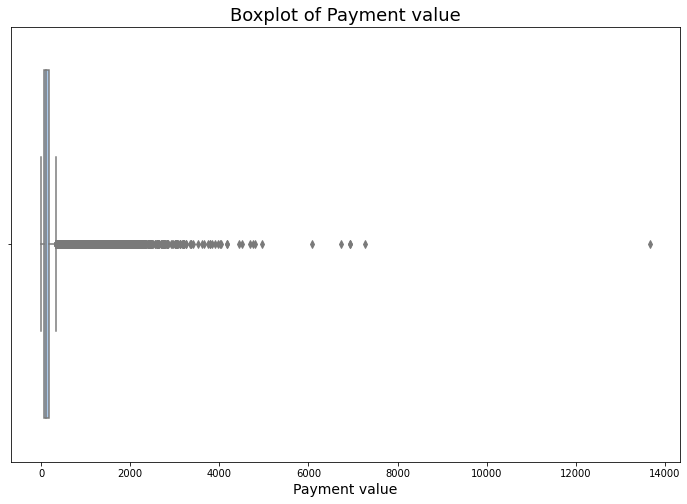

In [ ]:
ax = sns.boxplot(x='payment_value', data=data,
                   palette= 'pastel')
              
ax.figure.set_size_inches(12, 8)
ax.set_title('Boxplot of Payment value', fontsize=18)  
ax.set_xlabel('Payment value', fontsize=14)



ax

### Measures of central tendency without outliers

In [ ]:
print("Measures of central tendency with outliers")
print(f" Payment Value mean: {data.payment_value.mean()}\n Payment Value median: {data.payment_value.median()}\n Payment Value mode: {data.payment_value.mode()[0]}\n ")

Measures of central tendency with outliers
 Payment Value mean: 154.10038041698365
 Payment Value median: 100.0
 Payment Value mode: 50.0
 


### Maximmum and minimum values

In [ ]:
data.payment_value.max()

13664.08

In [ ]:
data.payment_value.min()

0.0

## Boxplot analysis without outlierss

To make a boxplot without the outliers I decided to find de Interquartil Range(IQR) and the values of 75th and 25th percentiles of the data, using this information I found the inferior and superior limit of the boxplot. After that I created another variable that contains only the payment values between inferior and superior limit and finally a boxplot that show us a better boxplot to analize.

Some informations gathered with the boxplot:


*   75th percent of the orders spent less than R$ 150.08, with this information it's possible to say that most people don't spent much money in a single order. A possible reason for this behavior is people making small shoppings or buying cheap stuff and making different orders to buy more than one thing.

*   Observing the boxplot and the histogram plot we can see a positively skewed distribution that usually happens when whe have mode < median < mean.

*    People usually spend R$ 50 in its orders.

*    The mean spent in the orders was around R$ 110




In [ ]:
IQR = data['payment_value'].quantile(0.75) - data['payment_value'].quantile(0.25)
IQR

115.04750000000001

In [ ]:
Q3 = data['payment_value'].quantile(0.75)
Q1 = data['payment_value'].quantile(0.25)
superior =  Q3 + 1.5 * IQR
inferior = Q1 - 1.5 * IQR


In [ ]:
payment_value_without_outliers = data.query(f'payment_value > {inferior} and payment_value < {superior}')['payment_value']

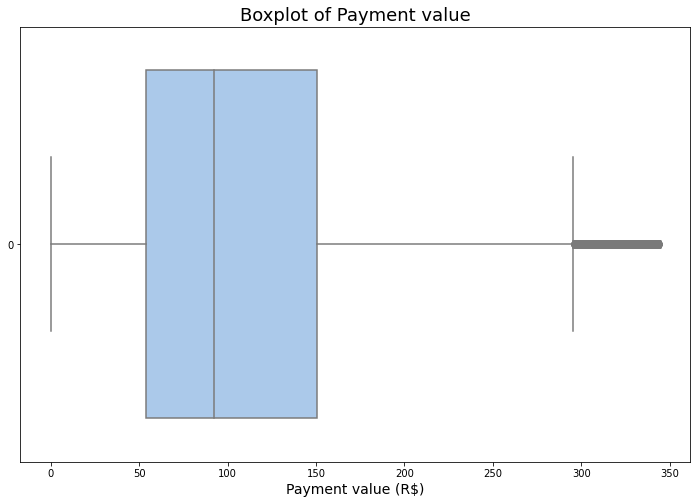

In [ ]:
ax = sns.boxplot(data=payment_value_without_outliers,
                   palette= 'pastel', orient = 'h')
              
ax.figure.set_size_inches(12, 8)
ax.set_title('Boxplot of Payment value', fontsize=18)  
ax.set_xlabel('Payment value (R$)', fontsize=14)



ax

In [ ]:
payment_value_without_outliers.mode()

0    50.0
dtype: float64

### Measures of central tendency without outliers

In [ ]:
print("Measures of central tendency without outliers")
print(f" Payment Value mean: {payment_value_without_outliers.mean()}\n Payment Value median: {payment_value_without_outliers.median()}\n Payment Value mode: {payment_value_without_outliers.mode()[0]}\n ")

Measures of central tendency without outliers
 Payment Value mean: 110.06213346540068
 Payment Value median: 92.2
 Payment Value mode: 50.0
 


In [ ]:
print(payment_value_without_outliers.quantile(q=0.75))

150.58


In [ ]:
aux = data.query(f'payment_value > {inferior} and payment_value < {superior}')
aux

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


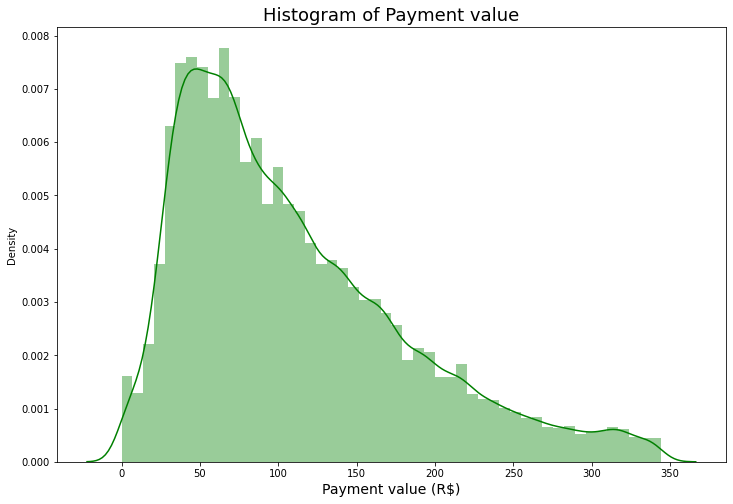

In [ ]:
ax = sns.distplot(payment_value_without_outliers, color= 'g')

ax.figure.set_size_inches(12, 8)
ax.set_title('Histogram of Payment value', fontsize=18)  
ax.set_xlabel('Payment value (R$)', fontsize=14)



ax

### Maximmum and minimum values

In [ ]:
payment_value_without_outliers.max()

344.34

In [ ]:
payment_value_without_outliers.min()

0.0

## Measures of dispersion 


*   Looking at standard deviation(std), when we compare the measure of all dataset and the dataset without outliers it's possible to see that the outliers interfere too much, making the std jump of 72.78 to 217.49. 
*   Even without outliers the standard deviation of 72.78 indicates that the values are spread out over a wider range





In [ ]:
data['payment_value'].var()

47303.66781639342

In [ ]:
payment_value_without_outliers.var()

5297.6640299796545

In [ ]:
data['payment_value'].std()

217.49406386472577

In [ ]:
payment_value_without_outliers.std()

72.78505361665714

### Standard deviation

In [ ]:
print(f'Standard deviation\n Dataset with outliers: {round(data.payment_value.std(),2)} \n Dataset without outliers: {round(payment_value_without_outliers.std(),2)}')

Standard deviation
 Dataset with outliers: 217.49 
 Dataset without outliers: 72.79


# Payment Installments

Conclusions: 



*   Most of people choose to pay in one installment.
*   Payment in 5 or 10 installments are much closer, there are  5239 occurancies of 5 installments and 5328 of 10 installments. 
*   Usually the orders have one to four installments. 



In [ ]:
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Frequency dataframe

In [ ]:
df_payment_installments = pd.DataFrame({'Frequency': data.payment_installments.value_counts(sort = True)}) # Create a dataframe with payment installments frequencies
df_payment_installments.reset_index(inplace = True) # reset index to use the old index as a column
df_payment_installments.rename(columns = {'index':'Payment Installments'}, inplace = True) # rename the column index 
df_payment_installments

,Payment Installments,Frequency
0,1,52546
1,2,12413
2,3,10461
3,4,7098
4,10,5328
5,5,5239
6,8,4268
7,6,3920
8,7,1626
9,9,644


In [ ]:
df_payment_installments.iloc[0:10]

,Payment Installments,Frequency
0,1,52546
1,2,12413
2,3,10461
3,4,7098
4,10,5328
5,5,5239
6,8,4268
7,6,3920
8,7,1626
9,9,644


### Visualization

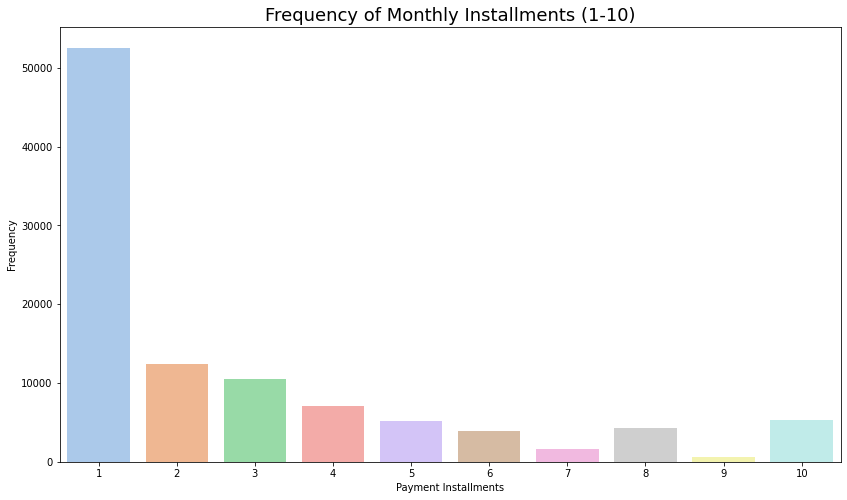

In [ ]:
ax = sns.barplot(x='Payment Installments', y='Frequency', data = df_payment_installments.iloc[0:10], palette='pastel')

ax.figure.set_size_inches(14,8)
ax.set_title('Frequency of Monthly Installments (1-10)', fontsize=18)
ax

# What is the correlation between the installments and payment value?

Conclusions:

After some exploration, analysis and thinking about the better way to vizualize the correlation between these features. I decided to use the lmplot function(fit regression models across the subsetsof a dataset), from seaborn, to plot the graph. 


*   The payment installments grow with the value of the order





In [ ]:
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# removing outliers from payment value
data_payment_value_without_outliers = data.query(f'payment_value > {inferior} and payment_value < {superior}')

## First Visualization

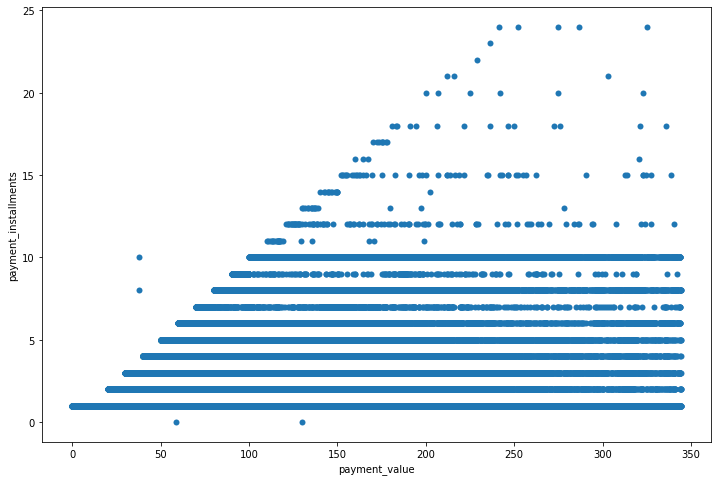

In [ ]:
ax = sns.scatterplot(y="payment_installments", x="payment_value",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data_payment_value_without_outliers)
ax.figure.set_size_inches(12, 8)
ax

This chart is a bad way to vizualize the correlation between installments and payment value, but you can notice that the payment installments grow with the payment value

In [ ]:
data_payment_value_without_outliers.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data_payment_value_without_outliers.groupby(by='payment_installments').mean()

,payment_sequential,payment_value
payment_installments,,
0,2.000000,94.315000
1,1.185484,89.055468
2,1.004237,113.765285
3,1.003519,121.286222
4,1.003951,129.800933
5,1.003174,136.508424
6,1.003863,143.307640
7,1.005032,125.877254
8,1.005751,177.581051


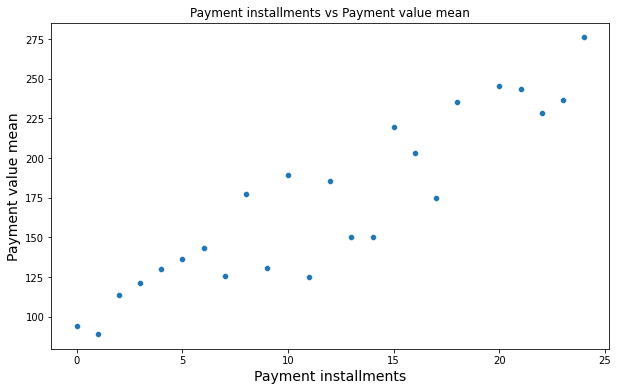

In [ ]:
ax = sns.scatterplot(x="payment_installments", y="payment_value",
                palette="ch:r=-.2,d=.3_r",
                data=data_payment_value_without_outliers.groupby(by='payment_installments').mean())
ax.figure.set_size_inches(10, 6)
ax.set_title("Payment installments vs Payment value mean")
ax.set_ylabel('Payment value mean', fontsize=14) 
ax.set_xlabel('Payment installments', fontsize=14) 
ax

In [ ]:
# Here I reset the index to make payment installments a column again and then use it to plot a new graph
data_payment_value_without_outliers.groupby(by='payment_installments').mean().reset_index()

,payment_installments,payment_sequential,payment_value
0,0,2.000000,94.315000
1,1,1.185484,89.055468
2,2,1.004237,113.765285
3,3,1.003519,121.286222
4,4,1.003951,129.800933
5,5,1.003174,136.508424
6,6,1.003863,143.307640
7,7,1.005032,125.877254
8,8,1.005751,177.581051
9,9,1.000000,130.755483


## Better visualization of Payment installments and payment value correlation

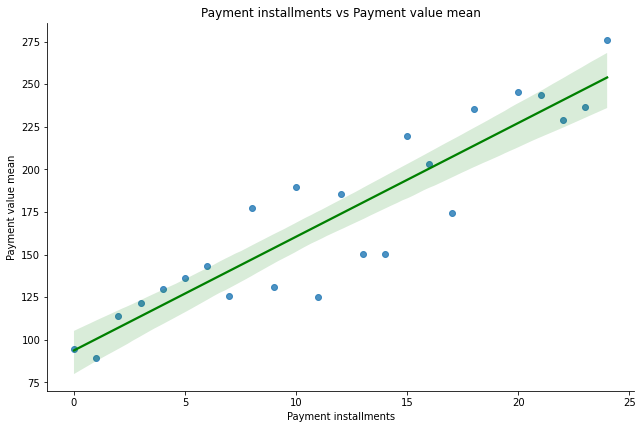

In [ ]:
ax = sns.lmplot(data=data_payment_value_without_outliers.groupby(by='payment_installments').mean().reset_index(),
                x='payment_installments', y='payment_value', line_kws={'color': 'g'})
ax.figure.set_size_inches(10, 6)
ax.set(xlabel='Payment installments', ylabel='Payment value mean', title = "Payment installments vs Payment value mean")

ax